In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# reading data and combining all sheets into one data frame, also filling missing values with 0 
all_sheets = pd.read_excel("Copy of Folds5x2_pp.xlsx", sheet_name=None)
sheet_names = list(all_sheets.keys())
combined_sheets = []
for sheet in all_sheets.items():
    combined_sheets.append(sheet[1])

combined_data = pd.concat(combined_sheets, ignore_index=True)

In [19]:
# basic info on data

print("Data Shape:", combined_data.shape)
print("\nFirst few rows:\n", combined_data.head())
print("\n")
print("\nBasic info:\n", combined_data.info())
print("\nDescriptive statistics:\n", combined_data.describe())

Data Shape: (47840, 5)

First few rows:
       AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47840 entries, 0 to 47839
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      47840 non-null  float64
 1   V       47840 non-null  float64
 2   AP      47840 non-null  float64
 3   RH      47840 non-null  float64
 4   PE      47840 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB

Basic info:
 None

Descriptive statistics:
                  AT             V            AP            RH            PE
count  47840.000000  47840.000000  47840.000000  47840.000000  47840.000000
mean      19.651231     54.305804   1013.259078     73.308978    454.365009
std        7.452162     12.707362    

In [20]:
# cleaning data by filling missing values with 0
combined_data.fillna(0, inplace=True)

In [21]:
def find_mean(data):
    mean = np.mean(data)
    return mean

In [22]:
def find_median(data):
    median = np.median(data)
    return median

In [23]:
def find_std_dev(data):
    std_dev = np.std(data)
    return std_dev

Statistics for each column:


Column: AT
Mean: 19.6512
Median: 20.3450
Standard Deviation: 7.4521


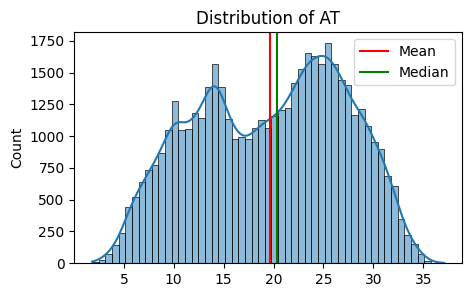


Column: V
Mean: 54.3058
Median: 52.0800
Standard Deviation: 12.7072


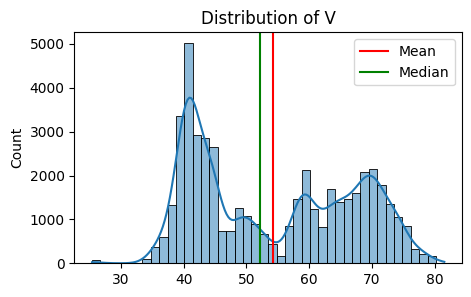


Column: AP
Mean: 1013.2591
Median: 1012.9400
Standard Deviation: 5.9385


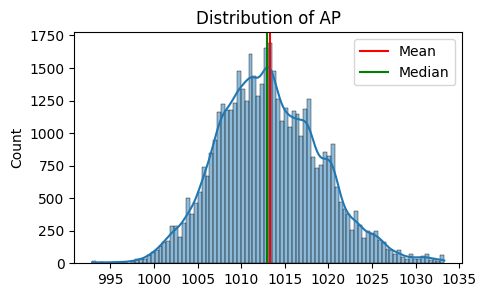


Column: RH
Mean: 73.3090
Median: 74.9750
Standard Deviation: 14.5995


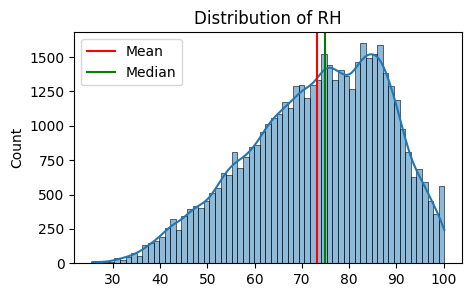


Column: PE
Mean: 454.3650
Median: 451.5500
Standard Deviation: 17.0661


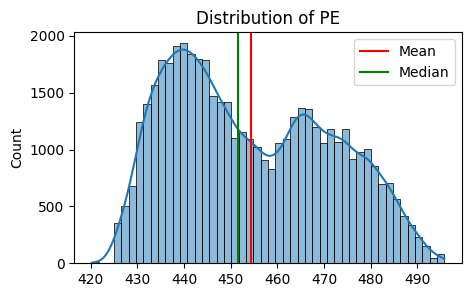

In [24]:
# calculating statistics for each column
print("Statistics for each column:\n")

for i, column in enumerate(combined_data.columns):
    data = combined_data.iloc[:, i].values
    
    print(f"\nColumn: {column}")
    print(f"Mean: {find_mean(data):.4f}")
    print(f"Median: {find_median(data):.4f}")
    print(f"Standard Deviation: {find_std_dev(data):.4f}")

    plt.figure(figsize=(5, 3))
    sns.histplot(data, kde=True)
    plt.axvline(find_mean(data), color='red', label='Mean')
    plt.axvline(find_median(data), color='green', label='Median')
    plt.legend()
    plt.title(f"Distribution of {column}")
    plt.show()
    


Outliers for each column (Z-score > 3):


Column: AT
Number of outliers: 0


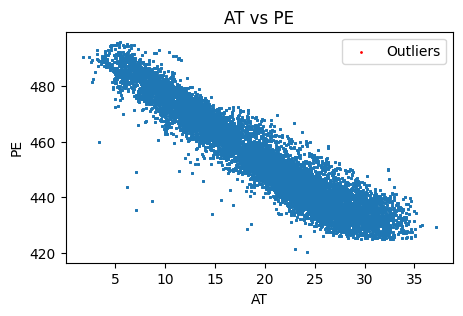


Column: V
Number of outliers: 0


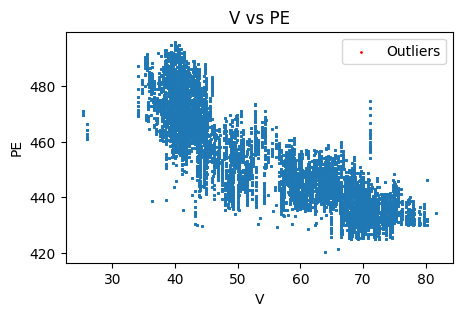


Column: AP
Number of outliers: 255


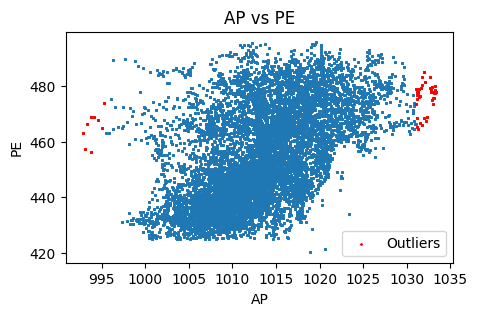


Column: RH
Number of outliers: 35


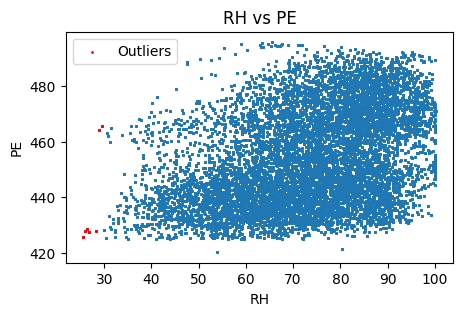

In [25]:
# calculating outliers using Z-scoring
print("\nOutliers for each column (Z-score > 3):\n")

input_columns = [col for col in combined_data.columns if col != 'PE']
output_column = 'PE'

for column in input_columns:
    x_data = combined_data[column].values
    y_data = combined_data[output_column].values
    
    mean = find_mean(x_data)
    std_dev = find_std_dev(x_data)
    
    z_scores = (x_data - mean) / std_dev
    outliers = np.abs(z_scores) > 3
    
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {np.sum(outliers)}")
    
    plt.figure(figsize=(5, 3))
    plt.scatter(x_data[~outliers], y_data[~outliers], s=1)
    plt.scatter(x_data[outliers], y_data[outliers], color='red', label='Outliers', s=1)
    plt.title(f"{column} vs {output_column}")
    plt.xlabel(column)
    plt.ylabel(output_column)
    plt.legend()
    plt.show()